In [12]:
import torchvision
dataset = torchvision.datasets.MNIST('datasets/mnist',download=True)

In [13]:
import tqdm
transform = torchvision.transforms.Resize((32,32))
j=0
for img,i in tqdm.tqdm(dataset):
    img = transform(img)
    img.save(f'datasets/mnist/{i}_{j}.png')
    j+=1

    if j>10000:
        break

 17%|█▋        | 10000/60000 [00:08<00:43, 1159.88it/s]


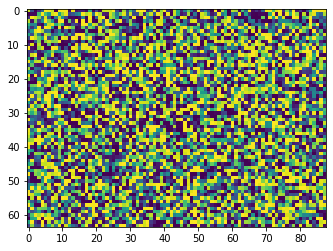

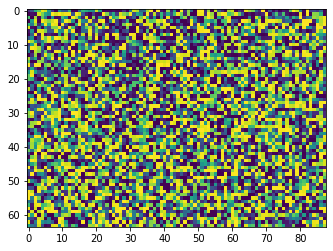

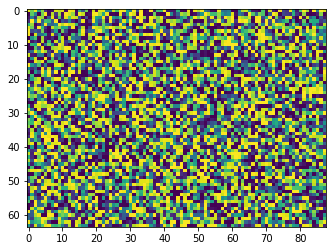

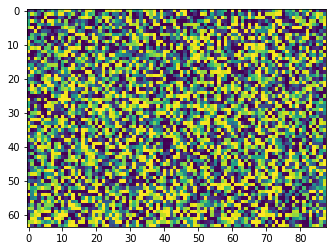

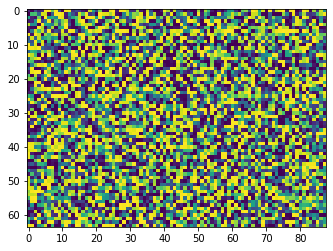

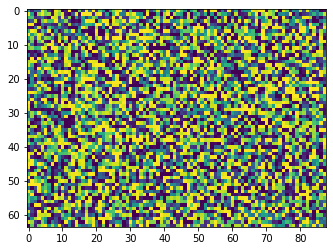

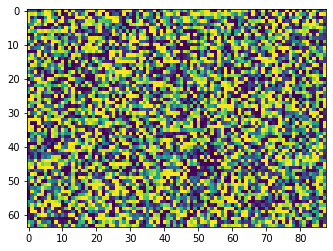

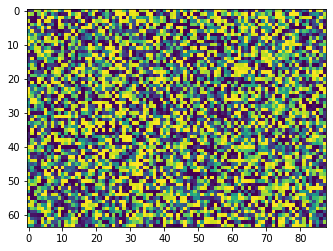

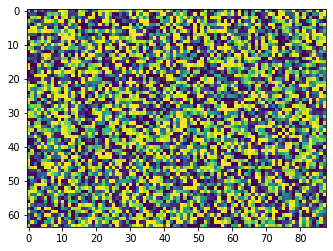

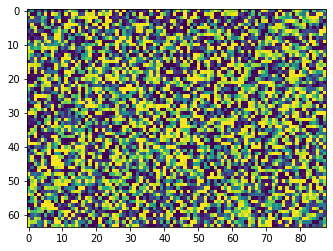

In [2]:
import numpy as np
import matplotlib.pyplot as plt
d = np.load('log/2ba/samples_model004000.npz')['arr_0']
for i in d:
    plt.figure()
    plt.imshow(i[:,:,:])

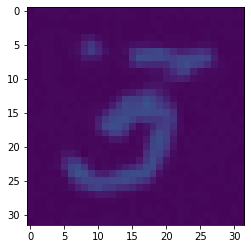

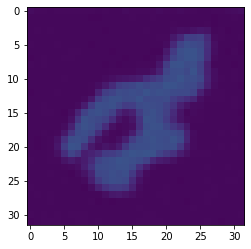

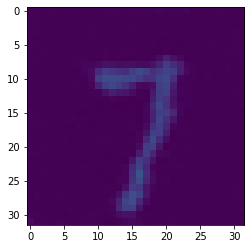

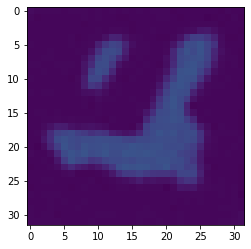

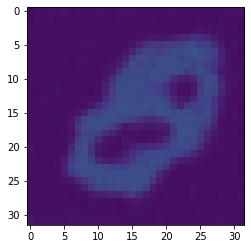

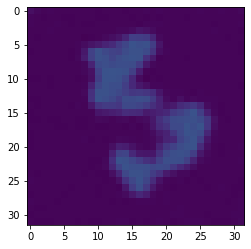

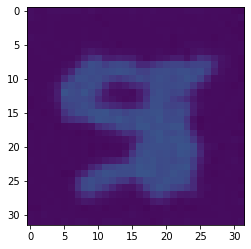

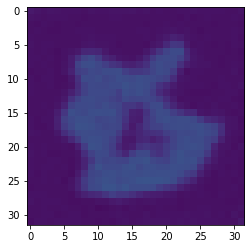

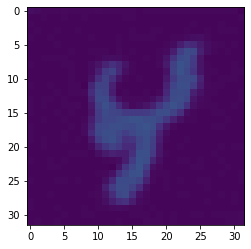

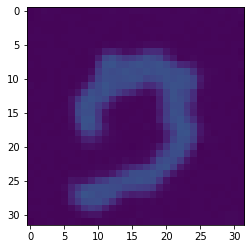

In [47]:
import numpy as np
import matplotlib.pyplot as plt
d = np.load('log_u2/samples_model001000.npz')['arr_0']
for i in d:
    plt.figure()
    plt.imshow(i[:,:,:],vmin=0,vmax=1000)

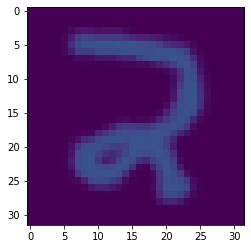

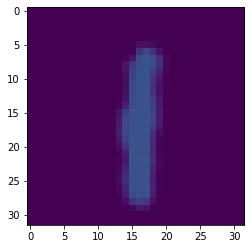

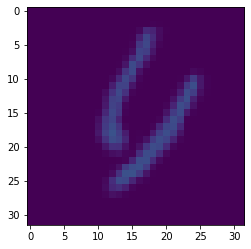

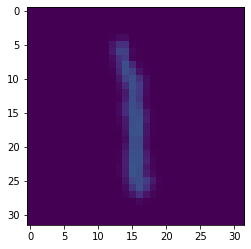

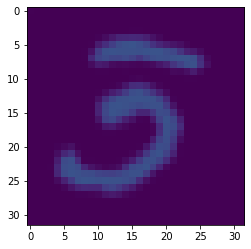

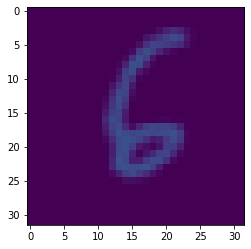

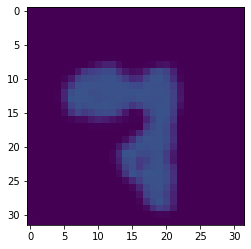

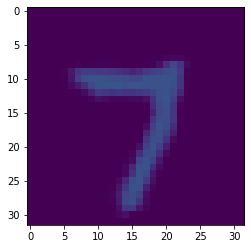

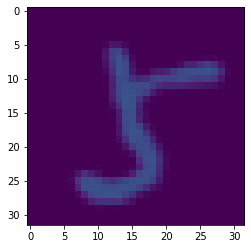

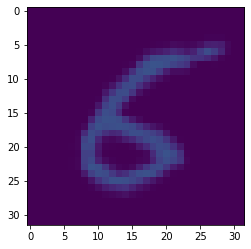

In [89]:
d.std()

96.54160938437404

In [52]:
s['arr_0'].shape


(100, 32, 3)

In [25]:
import numpy as np
import torch

In [31]:
pos = np.arange(0,4096)
pos_emb = [(pos//(2**i))%2 for i in range(11)]
pos_emb = np.stack(pos_emb)
pos_emb = torch.tensor(pos_emb).transpose(0,1)

In [32]:
pos_emb.shape

torch.Size([4096, 11])